SVM专治线性不可分

kernel trick核函数，主要是把数据从低维印射到高维，分为多项式内核（polynominal kernel）和radial basis function kernel(RBF)

In [1]:
import numpy as np

In [3]:
x=[1,2,3]
y=[4,5,6]
np.vstack((x,y))#只是把他们垂直地叠起来

array([[1, 2, 3],
       [4, 5, 6]])

linearSVC就是默认核函数是线性的，而且采用的是L2正则
"kernel"="linear"的话，虽然也是线性的，不过用的是L1正则
"kernel"="rbf"对应的参数是c和gamma,c指的是正则系数
“kernel”="poly"的话，对应的参数为c和degree，c就是正则参数，degree就是每个特征的数据乘多少次方
C越小，说明线性模型的参数越小，模型就越简单，c越大则模型越复杂
gamma越小，rbf内核直径越大，模型就越简单越容易欠拟合，反之就越容易过拟合

SVM如果数据量在1w以内的话都可以，超过10w就不行了，而且需要调参和数据预处理（标准化之类的），而决策树的话其实就很简单，不需要数据预处理


SVM的SVR是实现回归的，SVC是实现分类的

In [1]:
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()

In [3]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [5]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
boston['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [7]:
boston['target']

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
boston.data#可以直接.data，也可以['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [16]:
X,y=boston.data,boston.target

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=8)

In [18]:
X_train.shape

(379, 13)

In [19]:
X_test.shape

(127, 13)

In [21]:
from sklearn.svm import SVR

In [22]:
for kernel in ['linear','rbf']:
    svr=SVR(kernel=kernel)
    svr.fit(X_train,y_train)
    print(svr.score(X_test,y_test))

0.6964154693072283
0.0005910189684555922


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM对数据预处理的要求是比较高的

In [23]:
import matplotlib.pyplot as plt

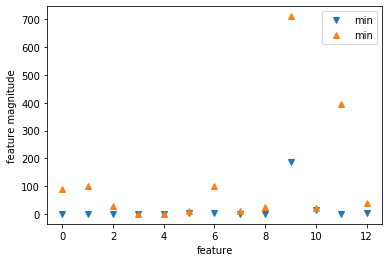

In [28]:
plt.plot(X.min(axis=0),'v',label='min')
plt.plot(X.max(axis=0),'^',label='min')
#plt.yscale('log')#取对数
plt.legend(loc='best')#按照label设置图注，Loc的位置最佳
plt.xlabel('feature')
plt.ylabel('feature magnitude')
plt.show()

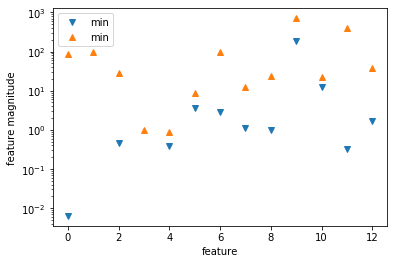

In [29]:
plt.plot(X.min(axis=0),'v',label='min')
plt.plot(X.max(axis=0),'^',label='min')
plt.yscale('log')#取对数
plt.legend(loc='best')#按照label设置图注，Loc的位置最佳
plt.xlabel('feature')
plt.ylabel('feature magnitude')
plt.show()

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler=StandardScaler()

In [32]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [34]:
X_train_scaled=scaler.transform(X_train)

In [35]:
X_test_scaled=scaler.transform(X_test)

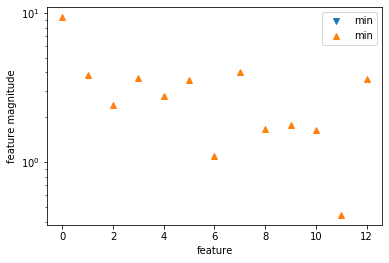

In [36]:
plt.plot(X_train_scaled.min(axis=0),'v',label='min')
plt.plot(X_train_scaled.max(axis=0),'^',label='min')
plt.yscale('log')#取对数
plt.legend(loc='best')#按照label设置图注，Loc的位置最佳
plt.xlabel('feature')
plt.ylabel('feature magnitude')
plt.show()

In [38]:
for kernel in ['linear','rbf']:
    svr=SVR(kernel=kernel)
    svr.fit(X_train_scaled,y_train)
    print(svr.score(X_test_scaled,y_test))

0.6983657869087585
0.694596722539397


In [40]:
for kernel in ['linear','rbf']:
    svr=SVR(kernel=kernel,C=100,gamma=0.1)
    svr.fit(X_train_scaled,y_train)
    print(svr.score(X_test_scaled,y_test))

0.6986276900732027
0.8940385882400999
